In [17]:
import pandas as pd
import numpy as np

In [18]:
df = pd.read_csv('sheet.csv', sep = ',')
df.head()

,driver_id,month_,Life_time
0,002be0ffdc997bd5c50703158b7c2491,3,8.561134
1,002be0ffdc997bd5c50703158b7c2491,4,10.784326
2,002be0ffdc997bd5c50703158b7c2491,5,12.354502
3,002be0ffdc997bd5c50703158b7c2491,6,10.577321
4,007f0389f9c7b03ef97098422f902e62,3,12.000977


# Overall Life time value

In [101]:
from statistics import median
median(df['Life_time'])


11.502854169999999

In [102]:
p_ = df[["driver_id",'month_', 'Life_time']]
pivoted = p_.groupby('driver_id')["Life_time"].median().reset_index()

pivoted

,driver_id,Life_time
0,002be0ffdc997bd5c50703158b7c2491,10.680824
1,007f0389f9c7b03ef97098422f902e62,9.621954
2,011e5c5dfc5c2c92501b8b24d47509bc,9.305323
3,0152a2f305e71d26cc964f8d4411add9,13.260777
4,01674381af7edd264113d4e6ed55ecda,13.800950
...,...,...
832,ff419a3476e21e269e340b5f1f05414e,13.516340
833,ff714a67ba8c6a108261cd81e3b77f3a,11.483160
834,fff482c704d36a1afe8b8978d5486283,10.605661
835,fffecccc49436c5389075b13209f0dfa,12.083274


# Driver wise (Absolute Measures)

In [103]:
p_ = df[["driver_id",'month_', 'Life_time']]
test1 =  p_.groupby('driver_id')["Life_time"].describe().reset_index()
test1['variance'] = test1['std']**2
test1['Range'] =  test1['max']-test1['min']
test1['IQR'] =  test1['75%']-test1['25%']
test1

,driver_id,count,mean,std,min,25%,50%,75%,max,variance,Range,IQR
0,002be0ffdc997bd5c50703158b7c2491,4.0,10.569321,1.556275,8.561134,10.073275,10.680824,11.176870,12.354502,2.421992,3.793368,1.103596
1,007f0389f9c7b03ef97098422f902e62,4.0,9.731948,1.850723,7.682906,8.632885,9.621954,10.721017,12.000977,3.425177,4.318071,2.088132
2,011e5c5dfc5c2c92501b8b24d47509bc,3.0,10.303018,2.010271,8.986749,9.146036,9.305323,10.961152,12.616981,4.041191,3.630232,1.815116
3,0152a2f305e71d26cc964f8d4411add9,3.0,12.544434,1.854579,10.438521,11.849649,13.260777,13.597391,13.934005,3.439463,3.495485,1.747742
4,01674381af7edd264113d4e6ed55ecda,3.0,14.033517,1.507291,12.656026,13.228488,13.800950,14.722262,15.643574,2.271928,2.987549,1.493774
...,...,...,...,...,...,...,...,...,...,...,...,...
832,ff419a3476e21e269e340b5f1f05414e,3.0,14.332972,1.970534,12.902037,13.209189,13.516340,15.048439,16.580537,3.883005,3.678500,1.839250
833,ff714a67ba8c6a108261cd81e3b77f3a,4.0,11.446371,1.022737,10.247864,10.825210,11.483160,12.104321,12.571298,1.045990,2.323435,1.279111
834,fff482c704d36a1afe8b8978d5486283,2.0,10.605661,2.266419,9.003061,9.804361,10.605661,11.406961,12.208262,5.136656,3.205201,1.602600
835,fffecccc49436c5389075b13209f0dfa,2.0,12.083274,1.166962,11.258107,11.670691,12.083274,12.495858,12.908441,1.361801,1.650334,0.825167


# Overall Data (Absolute Measures)

In [104]:
pivoted.describe()

,Life_time
count,837.000000
mean,11.951040
std,1.984662
min,6.822764
25%,10.718642
50%,11.542235
75%,12.816154
max,26.679037


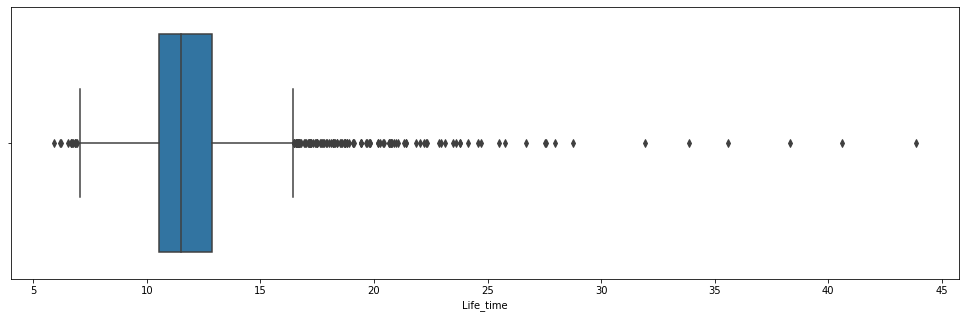

In [105]:
import seaborn as sns
#sns.set_theme(style="whitegrid")
import matplotlib.pyplot as plt
plt.figure(figsize=(17,5))
ax = sns.boxplot(df["Life_time"], hue="Life_time", data=pivoted)#, linewidth=2.5)

In [106]:
Range = pivoted['Life_time'].max() -  pivoted['Life_time'].min()
print("Range:", Range)

Range: 19.856272502000003


In [107]:
std = 1.984662
Variance = std**2
print("Variance", Variance)

Variance 3.9388832542439998


In [109]:
IQR = 12.816154-10.718642
print("Inter Quartile Range:",IQR)
Q1 = 10.718642
lower_check = Q1 - IQR*1.5
print("New Minimum as per Boxplot:", lower_check)
#df[df['Life_time']<lower_check]

Inter Quartile Range: 2.097512
New Minimum as per Boxplot: 7.572373999999999


In [28]:
df[["driver_id",'month_', 'Life_time']]

,driver_id,month_,Life_time
0,002be0ffdc997bd5c50703158b7c2491,3,8.561134
1,002be0ffdc997bd5c50703158b7c2491,4,10.784326
2,002be0ffdc997bd5c50703158b7c2491,5,12.354502
3,002be0ffdc997bd5c50703158b7c2491,6,10.577321
4,007f0389f9c7b03ef97098422f902e62,3,12.000977
...,...,...,...
2155,fff482c704d36a1afe8b8978d5486283,5,12.208262
2156,fffecccc49436c5389075b13209f0dfa,5,11.258107
2157,fffecccc49436c5389075b13209f0dfa,6,12.908441
2158,ffff51a71f2f185ec5e97d59dbcd7a78,5,12.491785


In [110]:
pivoted_test.max()

driver_id    ffff51a71f2f185ec5e97d59dbcd7a78
Life_time                                   4
dtype: object

In [5]:
pivoted['Life_time'].min()

6.822764447999999

In [6]:
pivoted['Life_time'].max()

26.67903695

In [7]:
pivoted['Scaled_Lifetime'] = pivoted['Life_time']/pivoted['Life_time'].max()

In [8]:
import seaborn as sns
sns.distplot(pivoted['Life_time'], hist = False, kde = True, 
                 kde_kws = {'shade': True, 'linewidth': 3})

C:\Users\albab.ahmad\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


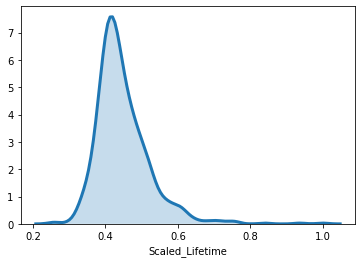

In [9]:
sns.distplot(pivoted['Scaled_Lifetime'], hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 3})

In [10]:
#Question 1 sub.

pivoted['Scaled_Lifetime'].mean()

0.44795620407028075

In [13]:
df['month_'].mean()

4.938425925925926

In [14]:
df.head(10)

,driver_id,month_,Life_time
0,002be0ffdc997bd5c50703158b7c2491,3,8.561134
1,002be0ffdc997bd5c50703158b7c2491,4,10.784326
2,002be0ffdc997bd5c50703158b7c2491,5,12.354502
3,002be0ffdc997bd5c50703158b7c2491,6,10.577321
4,007f0389f9c7b03ef97098422f902e62,3,12.000977
5,007f0389f9c7b03ef97098422f902e62,4,8.949544
6,007f0389f9c7b03ef97098422f902e62,5,10.294364
7,007f0389f9c7b03ef97098422f902e62,6,7.682906
8,011e5c5dfc5c2c92501b8b24d47509bc,4,12.616981
9,011e5c5dfc5c2c92501b8b24d47509bc,5,9.305323


In [80]:
df_new = pd.read_csv('sheet_new.csv', sep = ',')
df_new.head()

,driver_id,count_
0,002be0ffdc997bd5c50703158b7c2491,4
1,007f0389f9c7b03ef97098422f902e62,4
2,011e5c5dfc5c2c92501b8b24d47509bc,3
3,0152a2f305e71d26cc964f8d4411add9,3
4,01674381af7edd264113d4e6ed55ecda,3


In [16]:
df_new['count_'].median()

3.0